In [1]:
import pandas as pd
import numpy as np

import re
import openpyxl
import datetime as dt
import sqlite3
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
import decimal
import os
import sys

# SRC_DIR = r'/home/pp/program/jupyter/'
sys.path.append(os.path.dirname(r'/home/pp/program/jupyter/'))
from config import *

# Replace 'your_file.parquet' with the path to your Parquet file
df = pd.read_parquet(TEPLOTY_SK_DIR + 'teploty_sk.parquet'   )

print(df.head())

                Stanica  Teplota Smer  Rýchlosť Nárazy    Tlak Oblačnosť  \
49       Oravské Veselé     20.9    Z       2.0   None     NaN      None   
25               Košice     22.8   SZ       3.0   None  1013.6   Oblačno   
26  Košice - Podhradová     24.1   SV       2.0   None  1013.2      None   
27    Kráľova pri Senci     24.3    Z       3.0   None     NaN      None   
28       Kremnické Bane     20.2   SZ       2.0   None     NaN      None   

   Počasie  Graf             Cas_CET              file  
49    None   NaN 2025-07-30 14:00:00  2025-07-30-15-00  
25    None   NaN 2025-07-30 14:00:00  2025-07-30-15-00  
26    None   NaN 2025-07-30 14:00:00  2025-07-30-15-00  
27    None   NaN 2025-07-30 14:00:00  2025-07-30-15-00  
28    None   NaN 2025-07-30 14:00:00  2025-07-30-15-00  


In [2]:
df.index = df['Stanica']
brez = df.loc[['Brezno'],:]

In [3]:
brez

,Stanica,Teplota,Smer,Rýchlosť,Nárazy,Tlak,Oblačnosť,Počasie,Graf,Cas_CET,file
Stanica,,,,,,,,,,,
Brezno,Brezno,24.3,Z,2.0,None,1012.6,None,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00
Brezno,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-20
Brezno,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-25
Brezno,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-45
Brezno,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-30
...,...,...,...,...,...,...,...,...,...,...,...
Brezno,Brezno,11.0,V,1.0,None,1023.2,None,None,NaN,2025-09-25 17:00:00,2025-09-25-17-40
Brezno,Brezno,10.8,V,1.0,None,1023.7,None,None,NaN,2025-09-25 18:00:00,2025-09-25-18-40
Brezno,Brezno,10.6,V,1.0,None,1024.3,None,None,NaN,2025-09-25 19:00:00,2025-09-25-19-40


In [4]:
brez.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1376 entries, Brezno to Brezno
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Stanica    1376 non-null   object        
 1   Teplota    1376 non-null   float64       
 2   Smer       1375 non-null   object        
 3   Rýchlosť   1375 non-null   float64       
 4   Nárazy     0 non-null      object        
 5   Tlak       1374 non-null   float64       
 6   Oblačnosť  0 non-null      object        
 7   Počasie    0 non-null      object        
 8   Graf       0 non-null      float64       
 9   Cas_CET    1376 non-null   datetime64[us]
 10  file       1376 non-null   object        
dtypes: datetime64[us](1), float64(4), object(6)
memory usage: 161.3+ KB


In [5]:
tf = brez
tf.describe()
tf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1376 entries, Brezno to Brezno
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Stanica    1376 non-null   object        
 1   Teplota    1376 non-null   float64       
 2   Smer       1375 non-null   object        
 3   Rýchlosť   1375 non-null   float64       
 4   Nárazy     0 non-null      object        
 5   Tlak       1374 non-null   float64       
 6   Oblačnosť  0 non-null      object        
 7   Počasie    0 non-null      object        
 8   Graf       0 non-null      float64       
 9   Cas_CET    1376 non-null   datetime64[us]
 10  file       1376 non-null   object        
dtypes: datetime64[us](1), float64(4), object(6)
memory usage: 161.3+ KB


In [6]:
tf.Teplota = tf.Teplota.astype(float)
print(tf.describe())

           Teplota     Rýchlosť         Tlak  Graf                     Cas_CET
count  1376.000000  1375.000000  1374.000000   0.0                        1376
mean     17.156468     1.016000  1017.301164   NaN  2025-08-28 03:13:25.813953
min       2.700000     0.000000  1005.000000   NaN         2025-07-30 14:00:00
25%      12.500000     0.000000  1013.700000   NaN         2025-08-13 18:45:00
50%      16.350000     1.000000  1017.700000   NaN         2025-08-28 03:30:00
75%      22.025000     1.000000  1020.275000   NaN         2025-09-11 12:15:00
max      34.200000     4.000000  1030.000000   NaN         2025-09-25 21:00:00
std       6.227210     0.823441     5.026150   NaN                         NaN


In [7]:
tf.Teplota.astype(pd.Float32Dtype()).info() 


<class 'pandas.core.series.Series'>
Index: 1376 entries, Brezno to Brezno
Series name: Teplota
Non-Null Count  Dtype  
--------------  -----  
1376 non-null   Float32
dtypes: Float32(1)
memory usage: 49.8+ KB


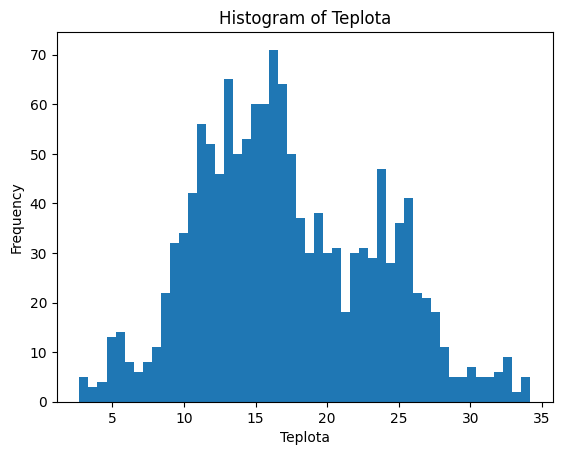

In [8]:
import matplotlib.pyplot as plt
plt.hist(tf.Teplota, bins=50)
plt.xlabel('Teplota')
plt.ylabel('Frequency')
plt.title('Histogram of Teplota')
plt.show()

In [9]:
tf

,Stanica,Teplota,Smer,Rýchlosť,Nárazy,Tlak,Oblačnosť,Počasie,Graf,Cas_CET,file
Stanica,,,,,,,,,,,
Brezno,Brezno,24.3,Z,2.0,None,1012.6,None,None,NaN,2025-07-30 14:00:00,2025-07-30-15-00
Brezno,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-20
Brezno,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-25
Brezno,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-45
Brezno,Brezno,24.9,JZ,2.0,None,1012.4,None,None,NaN,2025-07-30 15:00:00,2025-07-30-15-30
...,...,...,...,...,...,...,...,...,...,...,...
Brezno,Brezno,11.0,V,1.0,None,1023.2,None,None,NaN,2025-09-25 17:00:00,2025-09-25-17-40
Brezno,Brezno,10.8,V,1.0,None,1023.7,None,None,NaN,2025-09-25 18:00:00,2025-09-25-18-40
Brezno,Brezno,10.6,V,1.0,None,1024.3,None,None,NaN,2025-09-25 19:00:00,2025-09-25-19-40


In [10]:
tf.columns

Index(['Stanica', 'Teplota', 'Smer', 'Rýchlosť', 'Nárazy', 'Tlak', 'Oblačnosť',
       'Počasie', 'Graf', 'Cas_CET', 'file'],
      dtype='object')

In [11]:
tf['Cas_CET']

Stanica
Brezno   2025-07-30 14:00:00
Brezno   2025-07-30 15:00:00
Brezno   2025-07-30 15:00:00
Brezno   2025-07-30 15:00:00
Brezno   2025-07-30 15:00:00
                 ...        
Brezno   2025-09-25 17:00:00
Brezno   2025-09-25 18:00:00
Brezno   2025-09-25 19:00:00
Brezno   2025-09-25 20:00:00
Brezno   2025-09-25 21:00:00
Name: Cas_CET, Length: 1376, dtype: datetime64[us]

In [12]:
tf.Cas_CET

Stanica
Brezno   2025-07-30 14:00:00
Brezno   2025-07-30 15:00:00
Brezno   2025-07-30 15:00:00
Brezno   2025-07-30 15:00:00
Brezno   2025-07-30 15:00:00
                 ...        
Brezno   2025-09-25 17:00:00
Brezno   2025-09-25 18:00:00
Brezno   2025-09-25 19:00:00
Brezno   2025-09-25 20:00:00
Brezno   2025-09-25 21:00:00
Name: Cas_CET, Length: 1376, dtype: datetime64[us]

In [13]:
tf[['Cas_CET']]

,Cas_CET
Stanica,
Brezno,2025-07-30 14:00:00
Brezno,2025-07-30 15:00:00
Brezno,2025-07-30 15:00:00
Brezno,2025-07-30 15:00:00
Brezno,2025-07-30 15:00:00
...,...
Brezno,2025-09-25 17:00:00
Brezno,2025-09-25 18:00:00
Brezno,2025-09-25 19:00:00


In [14]:
dt = tf[['Cas_CET', 'Teplota']]
print(dt.head())
dt.info()
dt['Teplota'].astype(float).describe()


                    Cas_CET  Teplota
Stanica                             
Brezno  2025-07-30 14:00:00     24.3
Brezno  2025-07-30 15:00:00     24.9
Brezno  2025-07-30 15:00:00     24.9
Brezno  2025-07-30 15:00:00     24.9
Brezno  2025-07-30 15:00:00     24.9
<class 'pandas.core.frame.DataFrame'>
Index: 1376 entries, Brezno to Brezno
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Cas_CET  1376 non-null   datetime64[us]
 1   Teplota  1376 non-null   float64       
dtypes: datetime64[us](1), float64(1)
memory usage: 64.5+ KB


count    1376.000000
mean       17.156468
std         6.227210
min         2.700000
25%        12.500000
50%        16.350000
75%        22.025000
max        34.200000
Name: Teplota, dtype: float64

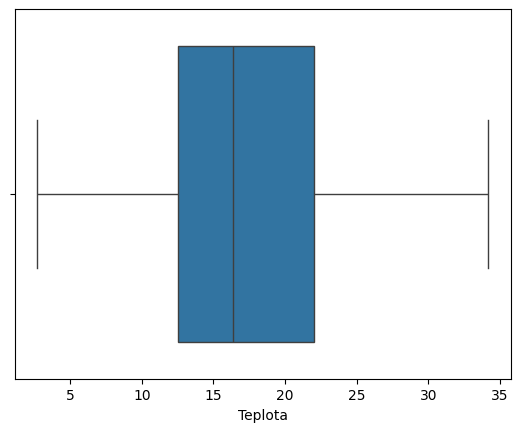

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.boxplot(x=dt['Teplota'].astype(float))
plt.show()

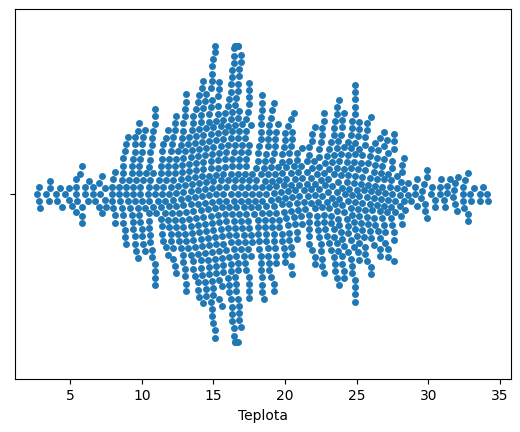

In [16]:
sns.swarmplot(x=dt['Teplota'].astype(float).head(1000))
plt.show()

In [17]:
data=df.head(10000).sort_values(by=['Cas_CET'])
data['Teplota'] = data['Teplota'].astype(float)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, Oravské Veselé to Lomnický štít
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Stanica    10000 non-null  object        
 1   Teplota    10000 non-null  float64       
 2   Smer       9894 non-null   object        
 3   Rýchlosť   9893 non-null   float64       
 4   Nárazy     126 non-null    object        
 5   Tlak       3930 non-null   float64       
 6   Oblačnosť  1614 non-null   object        
 7   Počasie    251 non-null    object        
 8   Graf       0 non-null      float64       
 9   Cas_CET    10000 non-null  datetime64[us]
 10  file       10000 non-null  object        
dtypes: datetime64[us](1), float64(4), object(6)
memory usage: 937.5+ KB


,Teplota,Rýchlosť,Tlak,Graf,Cas_CET
count,10000.000000,9893.000000,3930.000000,0.0,10000
mean,18.110370,1.889215,1013.571552,NaN,2025-08-01 12:02:13.920000
min,1.400000,0.000000,1009.400000,NaN,2025-07-30 14:00:00
25%,14.500000,1.000000,1012.300000,NaN,2025-07-31 10:00:00
50%,17.800000,1.000000,1013.500000,NaN,2025-08-01 12:00:00
75%,22.125000,2.000000,1014.900000,NaN,2025-08-02 14:00:00
max,30.200000,16.000000,1017.800000,NaN,2025-08-03 15:00:00
std,4.977884,1.513338,1.716789,NaN,NaN


In [18]:
df.Teplota = df.Teplota.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135439 entries, Oravské Veselé to Žilina - letisko
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Stanica    135439 non-null  object        
 1   Teplota    135439 non-null  float64       
 2   Smer       133932 non-null  object        
 3   Rýchlosť   133549 non-null  float64       
 4   Nárazy     1614 non-null    object        
 5   Tlak       54685 non-null   float64       
 6   Oblačnosť  20823 non-null   object        
 7   Počasie    3303 non-null    object        
 8   Graf       0 non-null       float64       
 9   Cas_CET    135439 non-null  datetime64[us]
 10  file       135439 non-null  object        
dtypes: datetime64[us](1), float64(4), object(6)
memory usage: 16.4+ MB


In [19]:
df.index.unique()

Index(['Oravské Veselé', 'Košice', 'Košice - Podhradová', 'Kráľova pri Senci',
       'Kremnické Bane', 'Kuchyňa', 'Liesek', 'Liptovská Osada',
       'Liptovský Hrádok', 'Liptovský Mikuláš - Ondrašová',
       ...
       'Kojsovská hoľa', 'Štrbské pleso', 'Želiezovce', 'Donovaly',
       'Košice - letisko', 'Lučenec - Boľkovce', 'Nitra - Velké Janíkovce',
       'Bratislava - letisko', 'Milhostov', 'Kuchyňa - Nový Dvor'],
      dtype='object', name='Stanica', length=108)

In [20]:
df.index =df.Stanica
dta=df.loc[['Dudince', 'Chopok'],['Teplota','Cas_CET']]
data=dta.loc[['Dudince'],:].sort_values(by=['Cas_CET'])
data

,Teplota,Cas_CET
Stanica,,
Dudince,27.5,2025-07-30 14:00:00
Dudince,27.3,2025-07-30 15:00:00
Dudince,27.3,2025-07-30 15:00:00
Dudince,27.3,2025-07-30 15:00:00
Dudince,27.3,2025-07-30 15:00:00
...,...,...
Dudince,13.0,2025-09-25 17:00:00
Dudince,13.0,2025-09-25 18:00:00
Dudince,13.0,2025-09-25 19:00:00


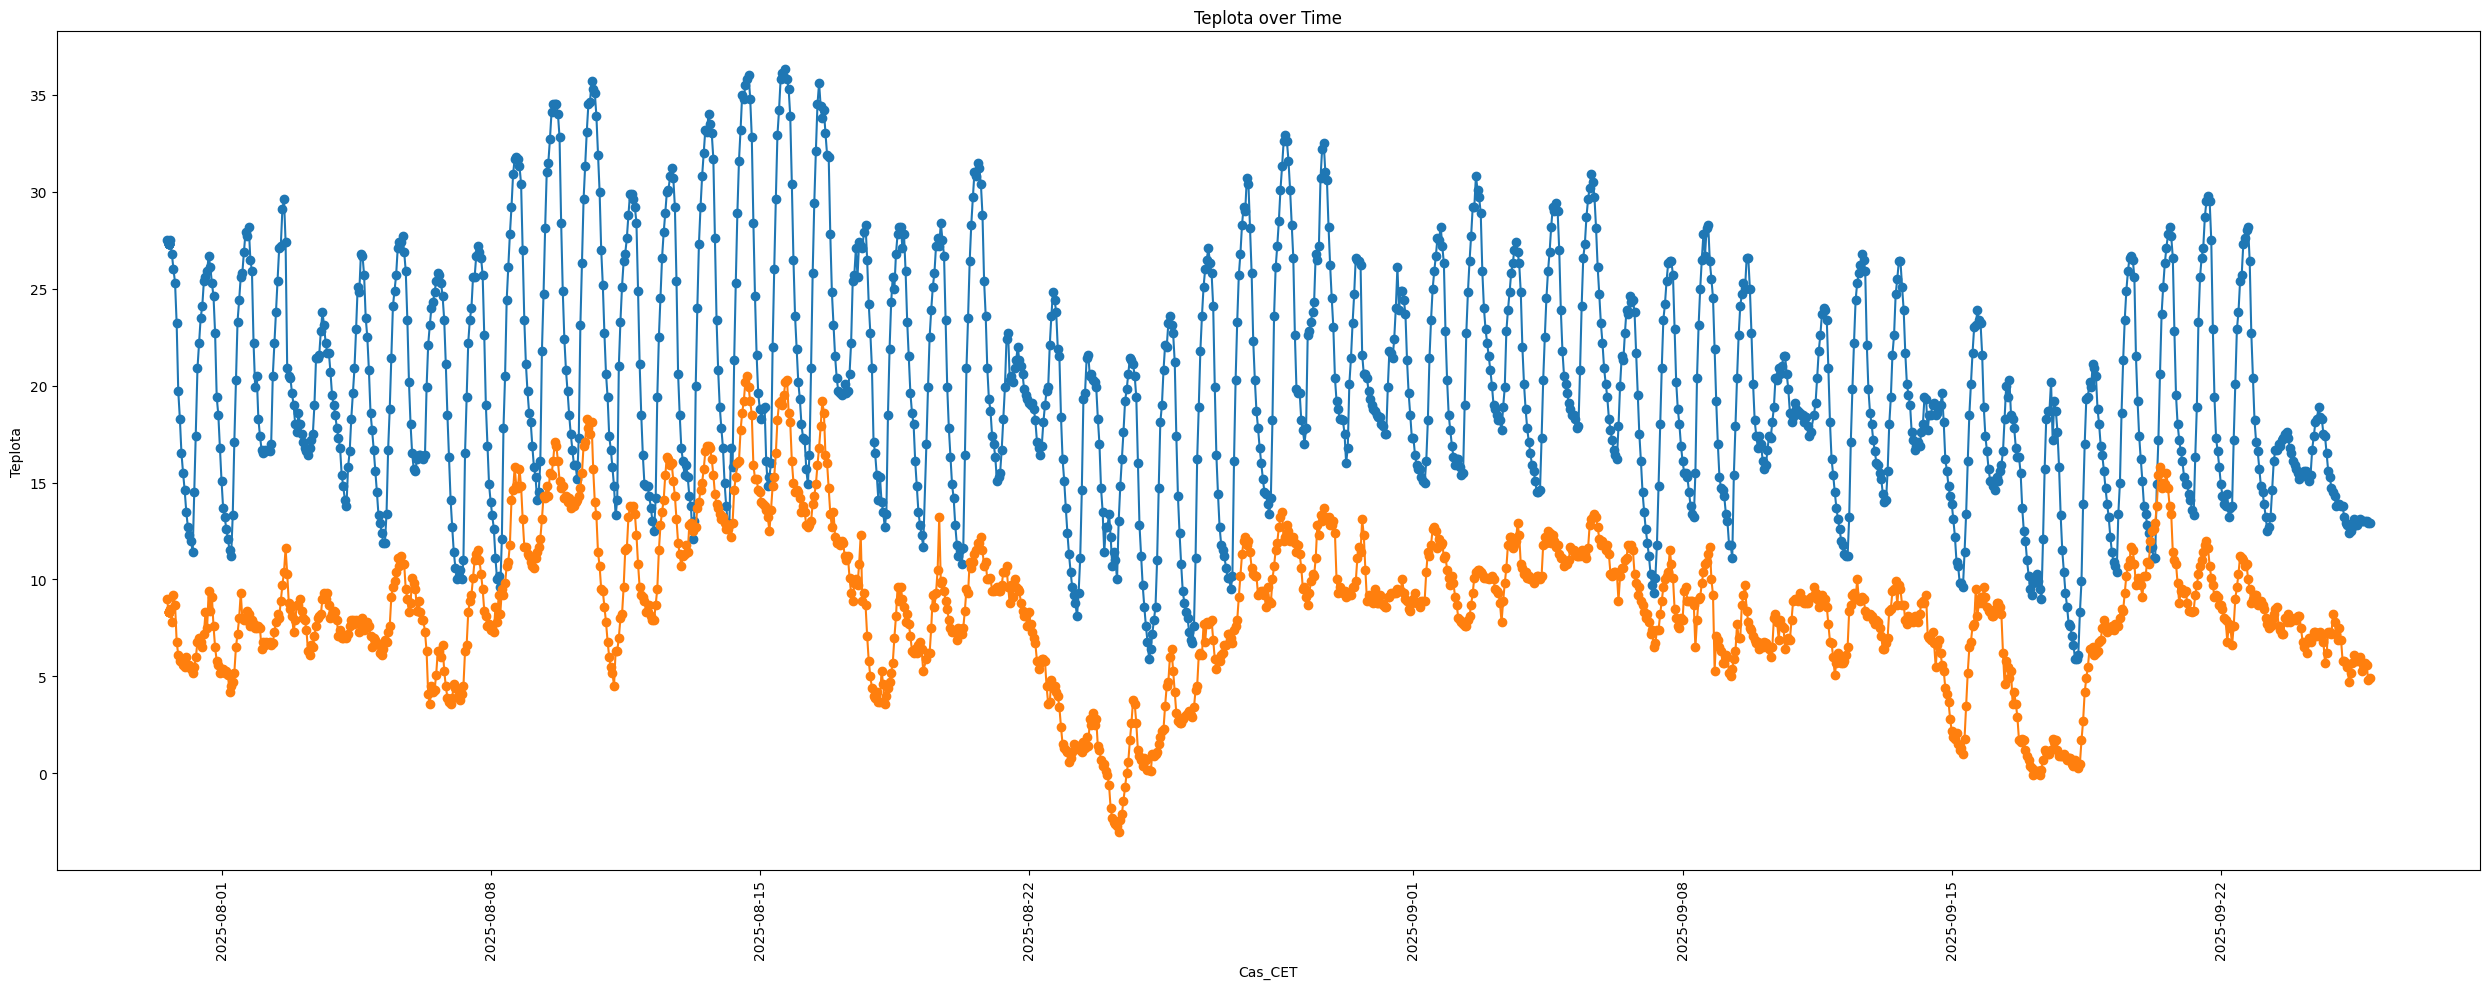

In [21]:
dta=df.loc[['Dudince', 'Žilina','Chopok'],['Teplota','Cas_CET']]
dta=df.loc[['Dudince', 'Chopok'],['Teplota','Cas_CET']]

plt.figure(figsize=(25, 10))
data=dta.loc[['Dudince'],:].sort_values(by=['Cas_CET'])
plt.plot(data['Cas_CET'], data['Teplota'],marker='o', linestyle='-')
data=dta.loc[['Chopok'],:].sort_values(by=['Cas_CET'])
plt.plot(data['Cas_CET'], data['Teplota'],marker='o', linestyle='-')
plt.xlabel('Cas_CET')
plt.ylabel('Teplota')
plt.title('Teplota over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.size=(150, 10)
plt.show()

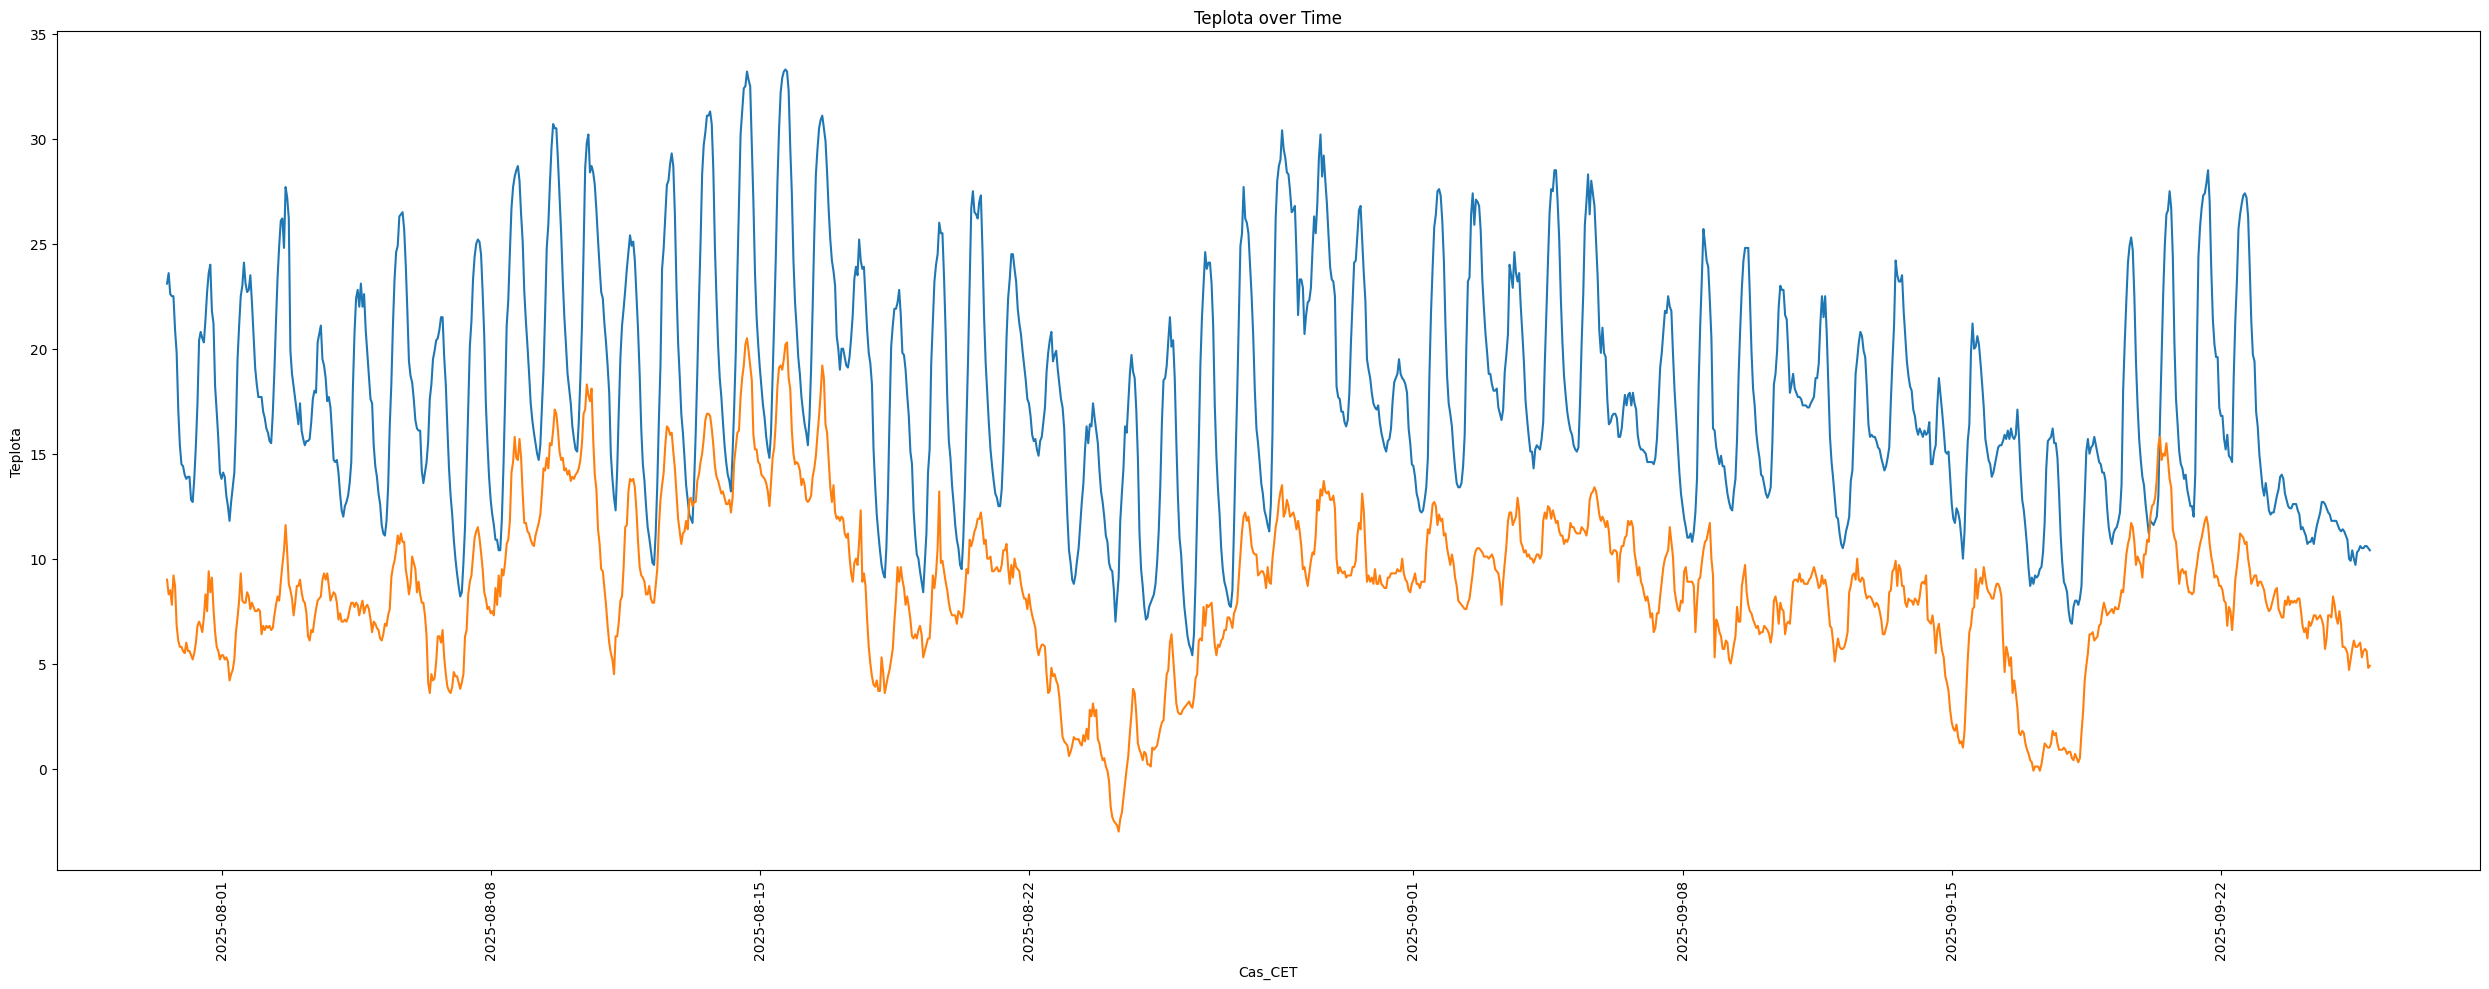

In [22]:
# dta=df.loc[['Dudince', 'Žilina','Chopok'],['Teplota','Cas_CET']]
# dta=df.loc[['Dudince', 'Chopok'],['Teplota','Cas_CET']]

plt.figure(figsize=(25, 10))
data=df.loc[['Žilina'],:].sort_values(by=['Cas_CET'])
plt.plot(data['Cas_CET'], data['Teplota'],marker='', linestyle='-')
data=df.loc[['Chopok'],:].sort_values(by=['Cas_CET'])
plt.plot(data['Cas_CET'], data['Teplota'],marker='', linestyle='-')
plt.xlabel('Cas_CET')
plt.ylabel('Teplota')
plt.title('Teplota over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.size=(150, 10)
plt.show()

In [23]:
dta=df.loc[['Dudince', 'Žilina','Chopok'],['Teplota','Cas_CET']]
dta=df.loc[['Dudince', 'Chopok'],['Teplota','Cas_CET']]
# df = df.drop('Stanica', axis=1)

# davg = df.groupby(df.Cas_CET.dt.dayofweek)['Teplota'].mean() #OK returns Series
#print(df[['Teplota','Cas_CET']]) #.info()
# davg.info()
# print(davg)
# davg = df[['Stanica', 'Teplota','Cas_CET']].groupby(pd.Grouper(key = 'Stanica')).mean() #OK Returns DataFrame
# davg.info()
# err davg = dta.groupby(pd.Grouper(key = ['Stanica', 'Cas_CET'], freq='1d')).mean()             #ERROR
# davg = df.groupby('Stanica').apply(lambda x: x.rolling('1D',on='Cas_CET',closed='left')['Teplota'].sum())
# davg = df.groupby(['Stanica', 'Cas_CET'])['Teplota'].mean().reset_index()
# print(davg)
# dmi = df.set_index('Cas_CET').groupby('Stanica').resample('1D')['Teplota'].mean().reset_index()
# print(dmi)


                       Stanica    Cas_CET    Teplota
0     Banská Bystrica - Zelená 2025-07-30  19.264103
1     Banská Bystrica - Zelená 2025-08-01  18.537500
2     Banská Bystrica - Zelená 2025-08-03  18.729167
3     Banská Bystrica - Zelená 2025-08-05  18.272917
4     Banská Bystrica - Zelená 2025-08-07  17.344681
...                        ...        ...        ...
2987          Žilina - letisko 2025-09-16  13.031250
2988          Žilina - letisko 2025-09-18  13.589583
2989          Žilina - letisko 2025-09-20  17.593750
2990          Žilina - letisko 2025-09-22  16.039583
2991          Žilina - letisko 2025-09-24  11.104348

[2992 rows x 3 columns]


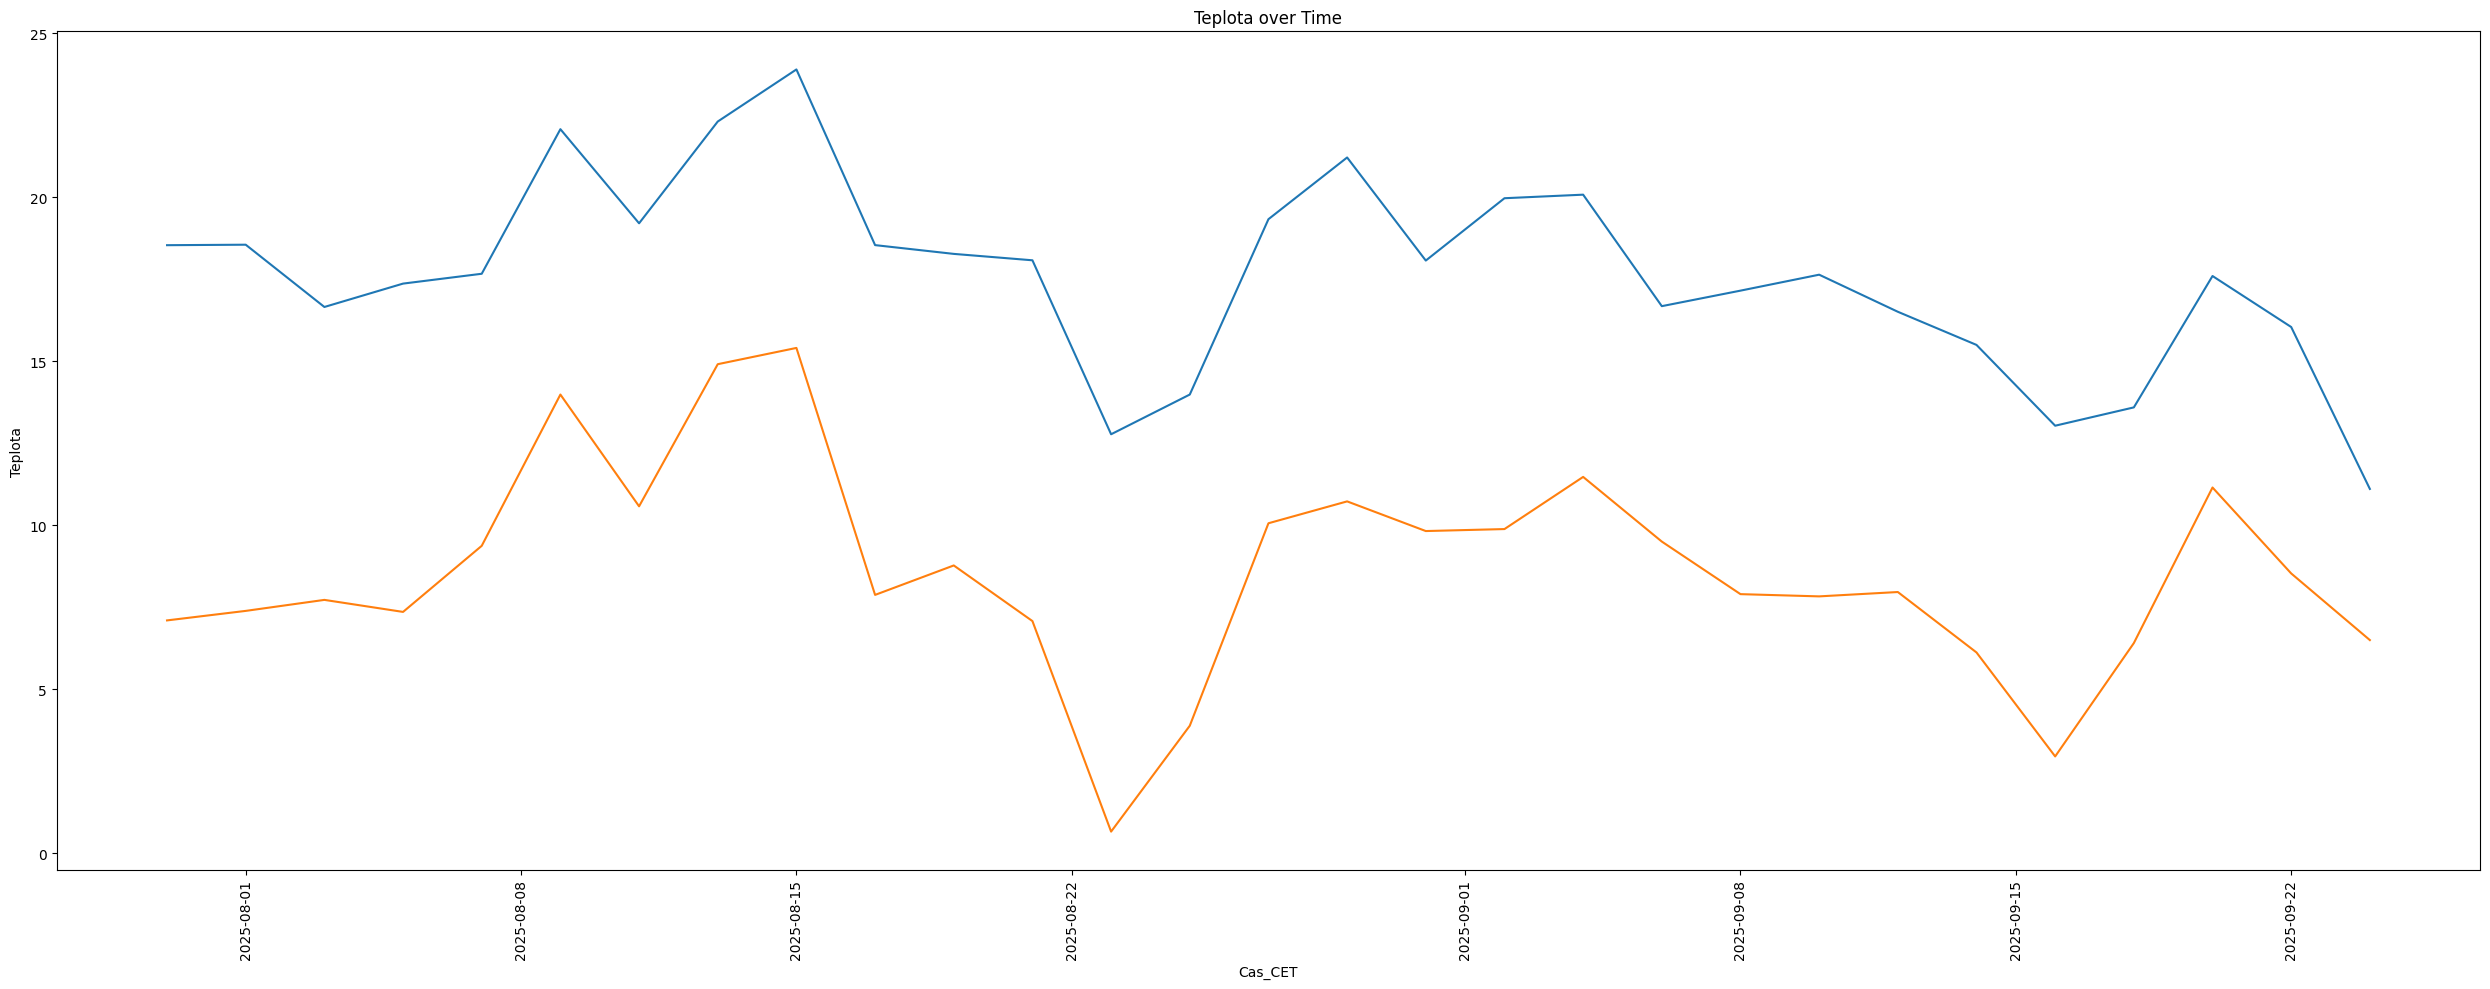

In [24]:
# df = df.drop('Stanica', axis=1)
# dmi = df.reset_index()
dmi = df.set_index(['Cas_CET']).groupby('Stanica').resample('2d')['Teplota'].mean().reset_index()

print(dmi)
dmi = dmi.set_index('Stanica')
plt.figure(figsize=(25, 10))
data = dmi.loc[['Žilina - letisko'],:].sort_values(by=['Cas_CET'])
plt.plot(data['Cas_CET'], data['Teplota'],marker='', linestyle='-')
data=dmi.loc[['Chopok'],:].sort_values(by=['Cas_CET'])
plt.plot(data['Cas_CET'], data['Teplota'],marker='', linestyle='-')
plt.xlabel('Cas_CET')
plt.ylabel('Teplota')
plt.title('Teplota over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.size=(150, 10)
plt.show()



In [25]:
#np.linspace(T.min(), T.max(), 300)
np.linspace(1, 20, 30)

array([ 1.        ,  1.65517241,  2.31034483,  2.96551724,  3.62068966,
        4.27586207,  4.93103448,  5.5862069 ,  6.24137931,  6.89655172,
        7.55172414,  8.20689655,  8.86206897,  9.51724138, 10.17241379,
       10.82758621, 11.48275862, 12.13793103, 12.79310345, 13.44827586,
       14.10344828, 14.75862069, 15.4137931 , 16.06896552, 16.72413793,
       17.37931034, 18.03448276, 18.68965517, 19.34482759, 20.        ])